In [5]:
import pandas as pd
import numpy as np
import lxml as sd
import html5lib as hlib
import seaborn as sa
#import numexpr as num
import matplotlib.pyplot as plt
from matplotlib import cm
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure, show
%matplotlib inline

# Importing the Cleaned Data into DataFrame

In [10]:
import csv

path =  'CleanData.csv'

with open(path, 'r') as infile, open(path + 'final.csv', 'w') as outfile:
     inputs = csv.reader(infile)
     output = csv.writer(outfile)

     for index, row in enumerate(inputs):
         output.writerow(row)
        
df = pd.read_csv("CleanData.csvfinal.csv")
df.head()

,Unnamed: 0,Date..GMT.,Platform,Author.Name,Author.URL,Author.Gender,Reach,Country,Region,City,...,Sentiment_Nived,Sentiment,URL,Published..GMT.,Tags,Brand,polarity,Unnamed: 19,emotion,polarity.1
0,1,4/24/2015,twitter,kathleen morgan,http://twitter.com/kmacmor,f,XS,united states,california,san diego,...,negative,negative,http://twitter.com/kmacmor/status/591430538906...,4/24/2015 2:36,NaN,Hughes,NaN,NaN,joy,positive
1,2,4/22/2015,twitter,Casey Cobb,http://twitter.com/Ccobb90,u,S,united states,virginia,lynchburg,...,negative,neutral,http://twitter.com/Ccobb90/status/590983788915...,4/22/2015 21:01,NaN,Hughes,NaN,NaN,NaN,positive
2,3,4/17/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,negative,neutral,http://twitter.com/hogwired08/status/589146706...,4/17/2015 19:21,NaN,Hughes,NaN,NaN,NaN,negative
3,4,4/17/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,neutral,negative,http://twitter.com/hogwired08/status/589030107...,4/17/2015 11:38,NaN,Hughes,NaN,NaN,sadness,negative
4,5,4/16/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,negative,negative,http://twitter.com/hogwired08/status/588762150...,4/16/2015 17:53,NaN,Hughes,NaN,NaN,anger,negative


## Creating an emotionKey for each emotion and filling the Null entries

In [11]:
df['emotionKey'] = df['emotion'] #creating one extra column to define number for each emotion
df['emotionKey'].fillna(0, inplace=True) #filling NA values with '0'

df.head()

,Unnamed: 0,Date..GMT.,Platform,Author.Name,Author.URL,Author.Gender,Reach,Country,Region,City,...,Sentiment,URL,Published..GMT.,Tags,Brand,polarity,Unnamed: 19,emotion,polarity.1,emotionKey
0,1,4/24/2015,twitter,kathleen morgan,http://twitter.com/kmacmor,f,XS,united states,california,san diego,...,negative,http://twitter.com/kmacmor/status/591430538906...,4/24/2015 2:36,NaN,Hughes,NaN,NaN,joy,positive,joy
1,2,4/22/2015,twitter,Casey Cobb,http://twitter.com/Ccobb90,u,S,united states,virginia,lynchburg,...,neutral,http://twitter.com/Ccobb90/status/590983788915...,4/22/2015 21:01,NaN,Hughes,NaN,NaN,NaN,positive,0
2,3,4/17/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,neutral,http://twitter.com/hogwired08/status/589146706...,4/17/2015 19:21,NaN,Hughes,NaN,NaN,NaN,negative,0
3,4,4/17/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,negative,http://twitter.com/hogwired08/status/589030107...,4/17/2015 11:38,NaN,Hughes,NaN,NaN,sadness,negative,sadness
4,5,4/16/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,negative,http://twitter.com/hogwired08/status/588762150...,4/16/2015 17:53,NaN,Hughes,NaN,NaN,anger,negative,anger


### Creating keys for each emotion, such that it can be plotted

In [12]:
df2 = df[['Brand', 'emotionKey', 'emotion']] #creating dataframe with three columns

# Disgust - 6, Joy - 5, Surprise - 4, Sadness - 3, Anger - 2, Fear - 1
# assigning keys to each emotion 
df2.loc[df['emotionKey'] == 'disgust', 'emotionKey'] = '6'
df2.loc[df['emotionKey'] == 'joy', 'emotionKey'] = '5'
df2.loc[df['emotionKey'] == 'surprise', 'emotionKey'] = '4'
df2.loc[df['emotionKey'] == 'sadness', 'emotionKey'] = '3'
df2.loc[df['emotionKey'] == 'anger', 'emotionKey'] = '2'
df2.loc[df['emotionKey'] == 'fear', 'emotionKey'] = '1'


df2["emotionKey"] = df2["emotionKey"].astype(int)
df2.head()

//anaconda/envs/py27/lib/python2.7/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyW

,Brand,emotionKey,emotion
0,Hughes,5,joy
1,Hughes,0,NaN
2,Hughes,0,NaN
3,Hughes,3,sadness
4,Hughes,2,anger


## Mining only the data for which emotion Key is not null

In [49]:
# Removing 0s
df3 = df2[df2.emotionKey != 0]
df3.head()

,Brand,emotionKey,emotion
0,Hughes,5,joy
3,Hughes,3,sadness
4,Hughes,2,anger
7,Hughes,1,fear
10,Hughes,3,sadness


### Getting the total number of values for each brand
- This will help us create a percentage for for each emotion as the amount of entries can skew the data

In [14]:
dft = df3['Brand'].value_counts()
dft.head()

CenturyLink    224
AT&T            39
Verizon         20
Hughes          15
ClearWire        5
Name: Brand, dtype: int64

## This plot shows us the number of response for each emotion for each Brand
## The key for each emotion key is
### 1 - Fear, 2- Anger, 3 - Sadness, 4- Surprise,  5 - Joy, 6 - Disgust

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e7daa90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ec24210>], dtype=object)

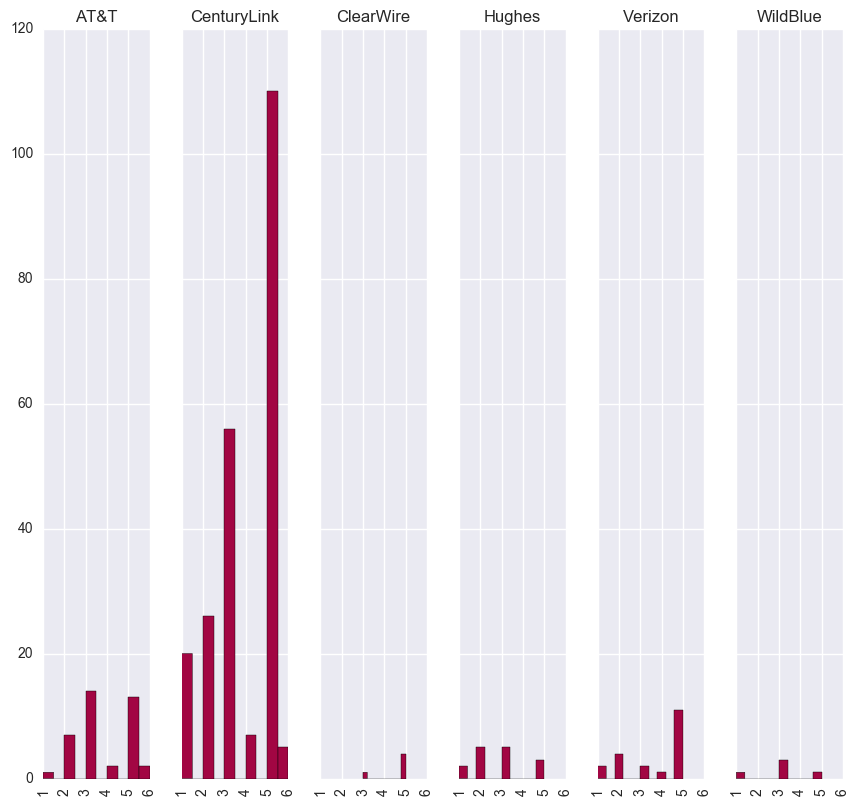

In [15]:
df3['emotionKey'].hist(by=df3['Brand'], figsize=(10,10), color=cm.Spectral(2),  layout=(1,6), sharex=True, sharey=True)

### Creating Sentiments for each brand instead of emtion

In [19]:
df4 = df[['Brand', 'Sentiment']]
df4.head()

,Brand,Sentiment
0,Hughes,negative
1,Hughes,neutral
2,Hughes,neutral
3,Hughes,negative
4,Hughes,negative


## We now create a dataframe which has the percentage of negative, positive and neutral for each brand

In [50]:
number_sentiment = {'AT&T':{'neutral':0, 'positive':0, 'negative':0},'Hughes':{'neutral':0, 'positive':0, 'negative':0},
             'WildBlue':{'neutral':0, 'positive':0, 'negative':0},'Verizon':{'neutral':0, 'positive':0, 'negative':0},
             'CenturyLink':{'neutral':0, 'positive':0, 'negative':0},'ClearWire':{'neutral':0, 'positive':0, 'negative':0}}

total_entries = {'CenturyLink': 224,'AT&T': 39,'Verizon': 20,'Hughes': 15,'ClearWire': 5}

for i,r in df4.iterrows():
    if(r['Sentiment'] is not np.nan):
        number_sentiment[r['Brand']][r['Sentiment']] += 1

for key, value in number_sentiment.iteritems():
    total = float(value['neutral']) + float(value['positive']) + float(value['negative'])
    value['neutral'] = round((float(value['neutral'])/total) * 100, 2)
    value['positive'] = round((float(value['positive'])/total) * 100, 2)
    value['negative'] = round((float(value['negative'])/total) * 100, 2)

print number_sentiment
l=[]
index = 0
brands = list(number_sentiment.keys())
for i in number_sentiment.values():
    temp = list(i.values())
    temp.insert(0, brands[index])
    l.append(temp)
    index +=1

df_col=list(number_sentiment['AT&T'].keys())
df_col.insert(0, 'Brand')
df_final = pd.DataFrame(l, index=[1,2,3,4,5,6], columns=df_col)
df_final.head()

{'Hughes': {'positive': 11.43, 'neutral': 28.57, 'negative': 60.0}, 'Verizon': {'positive': 31.94, 'neutral': 56.94, 'negative': 11.11}, 'WildBlue': {'positive': 20.0, 'neutral': 66.67, 'negative': 13.33}, 'ClearWire': {'positive': 27.27, 'neutral': 36.36, 'negative': 36.36}, 'AT&T': {'positive': 26.56, 'neutral': 44.53, 'negative': 28.91}, 'CenturyLink': {'positive': 17.07, 'neutral': 61.11, 'negative': 21.82}}


,Brand,positive,neutral,negative
1,Hughes,11.43,28.57,60.00
2,Verizon,31.94,56.94,11.11
3,WildBlue,20.00,66.67,13.33
4,ClearWire,27.27,36.36,36.36
5,AT&T,26.56,44.53,28.91


## Plotting the amount of positives, negative and neutral for each brand

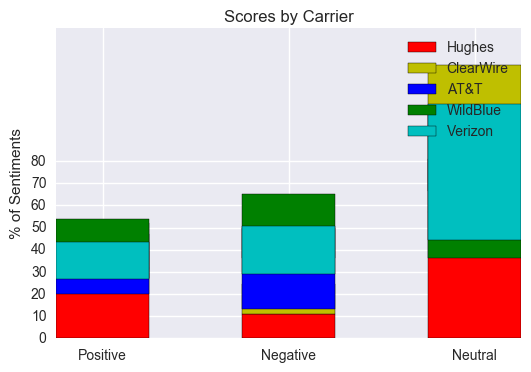

In [39]:
N=3
ind = np.arange(N) 
width = 0.5
p1 = (df_final.iloc[1]['positive'],df_final.iloc[1]['negative'],df_final.iloc[1]['neutral'])
p2 = (df_final.iloc[2]['positive'],df_final.iloc[2]['negative'],df_final.iloc[2]['neutral'])
p3 = (df_final.iloc[3]['positive'],df_final.iloc[3]['negative'],df_final.iloc[3]['neutral'])
p4 = (df_final.iloc[4]['positive'],df_final.iloc[4]['negative'],df_final.iloc[4]['neutral'])
p5 = (df_final.iloc[5]['positive'],df_final.iloc[5]['negative'],df_final.iloc[5]['neutral'])

p_hughes = plt.bar(ind, p1, width, color='r')
p_cl = plt.bar(ind, p2, width, color='y',bottom=p1)
p_att = plt.bar(ind, p3, width, color='b',bottom=p2)
p_wb = plt.bar(ind, p4, width, color='g',bottom=p3)
p_v = plt.bar(ind, p5, width, color='c',bottom=p4)

plt.ylabel('% of Sentiments')
plt.title('Scores by Carrier')
plt.xticks(ind + width/2., ('Positive', 'Negative', 'Neutral'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p_hughes[0], p_cl[0], p_att[0], p_wb[0],p_v[0]), ('Hughes', 'ClearWire', 'AT&T', 'WildBlue', 'Verizon'))

## For the negative feedback from users, we will create a Word Cloud from the tweets

In [56]:
from wordcloud import WordCloud,STOPWORDS
dfq=df[df['Sentiment']=='negative']
words = ' '.join(dfq['Content'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'ATT'
                                and word != 'centurylink'
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

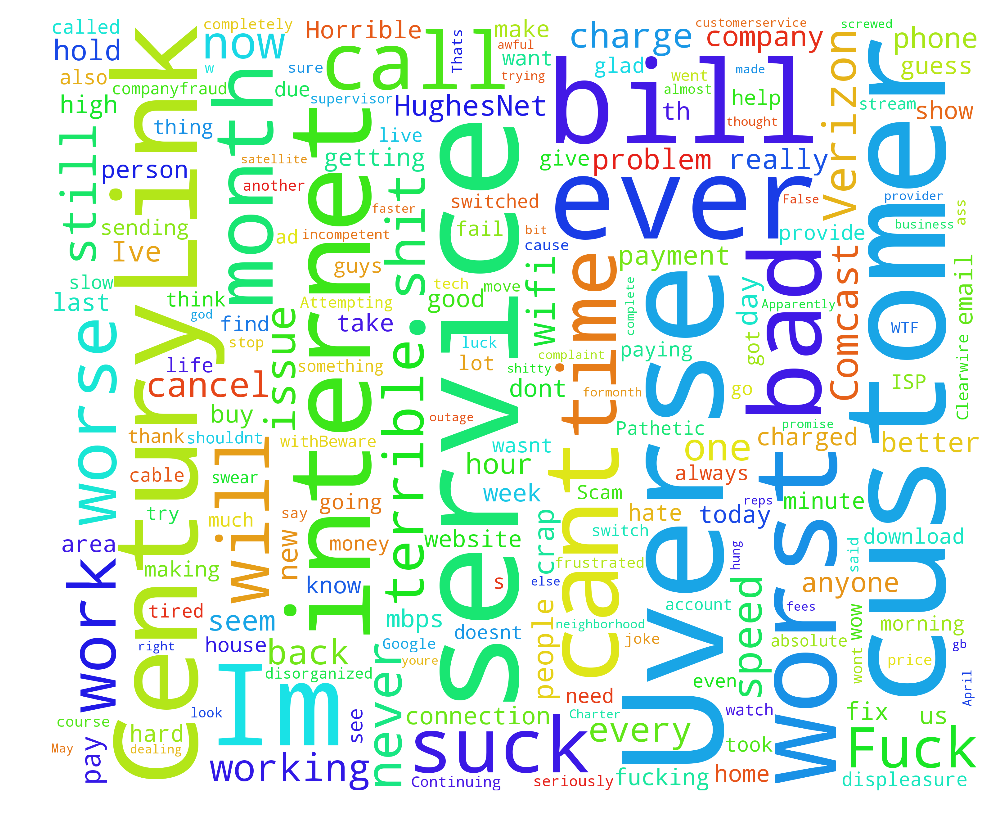

In [57]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with negative sentiment are frequently involved with some words like service, bill ,customer or internet. People might guess that customer tends to complain when they are trying to reach customer service, billing etc.